# Group/Individual Challenge!

The Boltzmann equation can be used to measure excitation temperature using observations multiple transitions of a molecule (see the **September 08** lecture) :

$\displaystyle \frac{N_u}{N_l} = \frac{g_u}{g_l} \exp\left(\frac{E_l - E_u}{k_B T_{ex}}\right)$

(1) Rewrite the Boltzmann equation as a function of $T_{ex}$, log$_{10}(N_u/g_u)$, and log$_{10}(N_l/g_l)$, and put this into the form of a slope of a line, e.g., $m = \left(\frac{y_2-y_1}{x_2-x_1}\right)$ 

(2) Use this relation to plot the following data set of NH$_3$ observations as a function of $E$. 


| **(J,K)** | **Energy** | **Column Density**|
| :- | :- | :- |
|  | $E/k_B$ (K) | $N$ (cm$^{-2}$) |
| (8,8)   | 686.8  | $4.8\times10^{13}$ |
| (9,9)   | 852.8  | $6.1\times10^{13}$ |
| (10,10) | 1036.4 | $1.5\times10^{13}$ |
| (11,11) | 1237.6 | $9.0\times10^{12}$ |
| (12,12) | 1456.4 | $1.4\times10^{13}$ |
| (13,13) | 1692.7 | $3.5\times10^{12}$ |


(3) Fit a slope to these data and use this to determine the excitation temperature (Note that for NH$_3$, T$_{ex}$ measured in this way is a good approximation for the true kinetic temperature $T_{kin}$).





In [9]:
import numpy as np                          # I use this for maths and sometimes arrays.
                                            # "np" is just an abbreviation since we call this package so often!
import pylab                                # I use this for arrays and plotting sometimes
import matplotlib
import matplotlib.pyplot as plt                    # Standard plotting package
import scipy

from astropy import units as u              # This one helps with unit conversion
from astropy.io import fits
from scipy.optimize import curve_fit


                                            # Super important!! 
                                            # This embeds plots in the Jupyter window 
                                            # (instead of showing them as pop-ups)
%matplotlib inline                             

plt.rc('font', family='sans-serif')  # Set plot fonts
plt.rc('text', usetex=True)      
plt.rc('text', usetex=False)        # This is a quick fix if you don't have latex on your computer




# Rearranging the Equation

Noting that $\ln{x} = 2.303 \log{x}$

Taking the natural log of both sides and defining $E \equiv -(E_u - E_l)$, 

$\ln{\frac{N_{u}g_{l}}{N_{l}g_{u}}} = \frac{-E}{k_B T_{exp}}$

$\ln{\frac{N_u}{g_u}}-\ln{\frac{N_l}{g_l}} = \frac{-E}{k_B T_{exp}}$

Converting to log-base 10:

$\log{\frac{N_u}{g_u}}-\log{\frac{N_l}{g_l}} = \frac{-E}{2.303 k_B T_{exp}}$

The slope of the equation is, 

$m = \frac{-1}{2.303  T_{exp}}$

The Excitation Temperature is 333.5 K


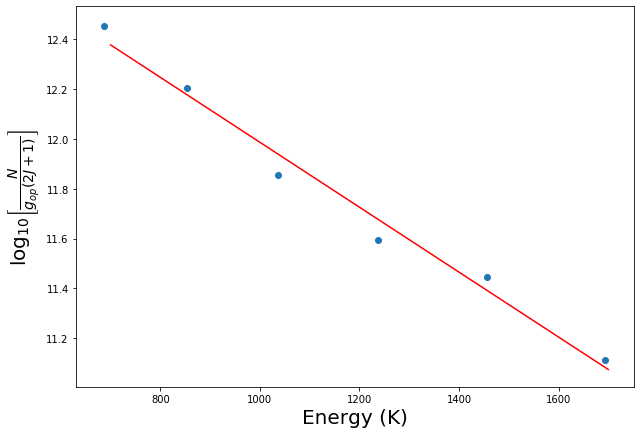

In [22]:
#Plotting the data
#Gether the table in the array
J = np.array([8,9,10,11,12,13])
E = np.array([686.8,852.8,1036.4,1237.6,1456.4,1692.7])
N = np.array([4.8e13,6.1e13,1.5e13,9.0e12,1.4e13,3.5e12])
gs = np.array([1,2,1,1,2,1])

#Fit for the line
def linear(x,m,b):
    return(m*x+b)

popt, pcov = curve_fit(linear, E, np.log10(N/(gs*(2*J+1))))

#Get T_exc from the slope

T_exc = -1/(2.303*popt[0])

print(f"The Excitation Temperature is {T_exc:0.4} K")

#Plotting stuff
vals = np.linspace(700,1700,100)
plt.figure(figsize=(10,7))
plt.plot(vals,linear(vals,popt[0],popt[1]),color='red')
plt.xlabel('Energy (K)',fontsize=20)
plt.ylabel('log$_{10}\\left[ \\frac{N}{g_{op}(2J+1)}\\right]$',fontsize=20)
plt.scatter(E,np.log10(N/(gs*(2*J+1))))



I enjoyed this exercise probably the most out of any of them prurely because it was good mix of doing actual math plus graphing data and getting a result from the fit.